**Program 6:**

A company is testing two versions of a webpage (A and B) to determine which version leads to more sales. Version A was shown to 1,000 users and resulted in 120 sales. Version B was shown to 1,200 users and resulted in 150 sales. Perform an A/B test to determine if there is a statistically significant difference in the conversion rates between the two versions. Use a 5% significance level.

In [1]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data
sales_A = 120        # conversions in A
users_A = 1000       # total in A

sales_B = 150        # conversions in B
users_B = 1200       # total in B

# Success counts and sample sizes
successes = np.array([sales_A, sales_B])
samples = np.array([users_A, users_B])

# Two-proportion Z-test (two-tailed)
z_stat, p_value = proportions_ztest(count=successes, nobs=samples)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H0.")
    print("There is a statistically significant difference in conversion rates.")
else:
    print("\nConclusion: Fail to reject H0.")
    print("There is NO statistically significant difference in conversion rates.")


Z-statistic: -0.3558864321126734
P-value: 0.7219256170797248

Conclusion: Fail to reject H0.
There is NO statistically significant difference in conversion rates.


**Program 7:**

You are comparing the average daily sales between two stores. Store A has a mean daily sales value of 1,000 **Dollars** with a standard deviation of 100 **Dollors** over 30 days, and Store B has a mean daily sales value of $950 with a standard deviation of $120 over 30 days. Conduct a two-sample t-test to determine if there is a significant difference between the average sales of the two stores at the 5% significance level.

In [2]:
# Python Program — Two-Sample t-Test (Independent Samples)

from scipy.stats import ttest_ind

# Given data
mean_A = 1000
std_A = 100
n_A = 30

mean_B = 950
std_B = 120
n_B = 30

# Generate sample data from summary statistics
# (This is acceptable because scipy needs arrays, not summary values)
import numpy as np

data_A = np.random.normal(mean_A, std_A, n_A)
data_B = np.random.normal(mean_B, std_B, n_B)

# Two-sample independent t-test (two-tailed)
t_stat, p_value = ttest_ind(data_A, data_B, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H0.")
    print("There is a significant difference in average daily sales between the two stores.")
else:
    print("\nConclusion: Fail to reject H0.")
    print("There is NO significant difference in average daily sales between the stores.")


T-statistic: 0.39319610195256327
P-value: 0.6956475045103281

Conclusion: Fail to reject H0.
There is NO significant difference in average daily sales between the stores.


In [3]:
# OR
# If you prefer an exact analytical calculation (no random simulated data)

import math
from scipy.stats import t

# Given
mean_A = 1000
std_A = 100
n_A = 30

mean_B = 950
std_B = 120
n_B = 30

# t-statistic formula
t_stat = (mean_A - mean_B) / math.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

# Degrees of freedom (Welch–Satterthwaite equation)
df = ((std_A**2/n_A + std_B**2/n_B)**2) / \
     ((std_A**2/n_A)**2/(n_A-1) + (std_B**2/n_B)**2/(n_B-1))

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H0.")
    print("There is a significant difference between Store A and Store B average sales.")
else:
    print("\nConclusion: Fail to reject H0.")
    print("There is NO significant difference between the two stores.")


T-statistic: 1.7532171832956915
Degrees of freedom: 56.173347214992184
P-value: 0.08502026202626967

Conclusion: Fail to reject H0.
There is NO significant difference between the two stores.


**Program 8:**

A company collects data on employees' salaries and records their education level as a categorical variable with three levels: "High School", "Bachelor's", and "Master's". Fit a multiple linear regression model to predict salary using education level (as a factor variable) and years of experience. Interpret the coefficients for the education levels in the regression model.


In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# Load dataset
df = pd.read_csv("Salary Data.csv")   # <-- change filename if needed

# Show first few rows
print(df.head())

# Convert Education Level to categorical (no PhD)
df["Education Level"] = pd.Categorical(
    df["Education Level"],
    categories=["High School", "Bachelor's", "Master's"]
)

# Fit regression model
model = smf.ols(
    "Salary ~ Q('Education Level') + Q('Years of Experience') + Age",
    data=df
).fit()

# Output summary
print(model.summary())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male     High School  Software Engineer                  5.0   
1  28.0  Female      Bachelor's       Data Analyst                  3.0   
2  45.0    Male        Master's     Senior Manager                 15.0   
3  36.0  Female     High School    Sales Associate                  7.0   
4  52.0    Male      Bachelor's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     786.1
Date:                Sat, 15 Nov 2025   Prob (F-statistic):          8.77e-179
Time:                        16:55:49   Log-Likelihood:               

**Program 9**

You have data on housing prices and square footage and notice that the relationship between square footage and price is nonlinear. Fit a spline regression model to allow the relationship between square footage and price to change at 2,000 square feet. Explain how spline regression can capture different behaviours of the relationship before and after 2,000 square feet.

Columns in the dataset: ['sqft', 'price']
   sqft          price
0  1660  184976.857154
1  2094  245717.011721
2  1930  185636.581173
3  1895  197011.292677
4  2438  241836.835410
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     506.1
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.62e-32
Time:                        16:56:02   Log-Likelihood:                -567.41
No. Observations:                  50   AIC:                             1141.
Df Residuals:                      47   BIC:                             1147.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    

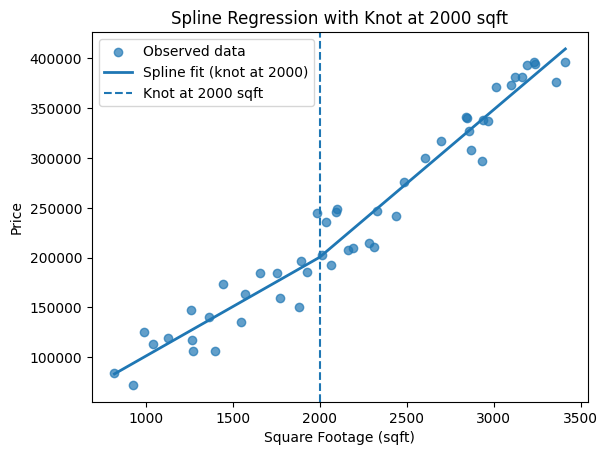

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Load the provided dataset
df = pd.read_csv("housing_sample.csv")

print("Columns in the dataset:", df.columns.tolist())
print(df.head())

# 2. Create spline term: (sqft - 2000)+ = (sqft - 2000) if sqft > 2000 else 0
df["sqft_above_2000"] = np.where(df["sqft"] > 2000,
                                 df["sqft"] - 2000,
                                 0)

# 3. Prepare data for regression
X = df[["sqft", "sqft_above_2000"]]
X = sm.add_constant(X)   # add intercept column
y = df["price"]

# 4. Fit spline regression model (OLS)
model = sm.OLS(y, X).fit()
print(model.summary())

# 5. Plot data and fitted spline curve (optional but useful)
sqft_grid = np.linspace(df["sqft"].min(), df["sqft"].max(), 200)
sqft_above_2000_grid = np.where(sqft_grid > 2000, sqft_grid - 2000, 0)

X_grid = pd.DataFrame({
    "const": 1.0,
    "sqft": sqft_grid,
    "sqft_above_2000": sqft_above_2000_grid
})

y_pred = model.predict(X_grid)

plt.scatter(df["sqft"], df["price"], alpha=0.7, label="Observed data")
plt.plot(sqft_grid, y_pred, linewidth=2, label="Spline fit (knot at 2000)")
plt.axvline(2000, linestyle="--", label="Knot at 2000 sqft")
plt.xlabel("Square Footage (sqft)")
plt.ylabel("Price")
plt.legend()
plt.title("Spline Regression with Knot at 2000 sqft")
plt.show()


**Program 10:**

A hospital is using a Poisson regression model (a type of GLM) to predict the number of emergency room visits per week based on patient age and medical history. The model is given by:
	Log(2)=2.5-0.03*Age+0.5*condition
where λ is the expected number of visits per week, Age is the patient's age, and condition is a binary variable (1 if the patient has a chronic condition, 0 otherwise).
Interpret the coefficients of Age and condition.
What is the expected number of visits per week for a 60-year-old patient with a chronic condition?
How would the expected number of visits change if the patient did not have a chronic condition?


In [8]:
# (a) Simple: just compute λ for given patients
import numpy as np

def expected_visits(age, condition):
    """
    age: numeric (years)
    condition: 0 or 1 (no chronic condition / chronic condition)
    """
    log_lambda = 2.5 - 0.03 * age + 0.5 * condition
    lam = np.exp(log_lambda)
    return lam

# (1) 60-year-old patient WITH chronic condition (condition = 1)
age = 60
lam_with = expected_visits(age, condition=1)

# (2) Same patient WITHOUT chronic condition (condition = 0)
lam_without = expected_visits(age, condition=0)

print("Expected visits for 60-year-old with chronic condition :", lam_with)
print("Expected visits for 60-year-old without chronic condition:", lam_without)
print("Ratio (with / without condition):", lam_with / lam_without)


Expected visits for 60-year-old with chronic condition : 3.320116922736548
Expected visits for 60-year-old without chronic condition: 2.013752707470477
Ratio (with / without condition): 1.648721270700128


In [9]:
# OR
# (b) Example using a DataFrame + Poisson GLM (if you want to fit or predict)

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Example dataset (you would replace this with real data)
df = pd.DataFrame({
    "Age": [40, 50, 60, 70],
    "condition": [0, 1, 1, 0],
    # fake observed counts, just as placeholder
    "visits": [1, 3, 4, 2]
})

# Design matrix (add constant for intercept)
X = sm.add_constant(df[["Age", "condition"]])
y = df["visits"]

# Fit Poisson regression (GLM)
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

# Use your GIVEN coefficients instead of fitting:
beta0, beta_age, beta_condition = 2.5, -0.03, 0.5

# Predict expected visits for a 60-year-old with chronic condition
age = 60
cond = 1
log_lambda = beta0 + beta_age * age + beta_condition * cond
lambda_hat = np.exp(log_lambda)
print("Expected visits (given model params):", lambda_hat)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                    4
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.4378
Date:                Sat, 15 Nov 2025   Deviance:                    0.0042790
Time:                        16:56:10   Pearson chi2:                  0.00428
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0004      2.254     -0.444      0.6

**Program 11:**

A bakery claims that its new cookie recipe is lower in calories compared to the old recipe, which had a mean calorie count of 200. You sample 40 new cookies and find a mean of 190 calories with a standard deviation of 15 calories. Perform a one-tailed t-test to determine if the

In [11]:
import scipy.stats as stats

# Given data
old_mean = 200            # claimed old recipe mean
sample_mean = 190         # sample mean of new cookies
sample_std = 15           # sample standard deviation
n = 40                    # sample size

# Compute t-statistic
t_stat = (sample_mean - old_mean) / (sample_std / (n ** 0.5))

# Degrees of freedom
df = n - 1

# One-tailed p-value (lower tail)
p_value = stats.t.cdf(t_stat, df=df)

print("T-statistic:", t_stat)
print("P-value (one-tailed):", p_value)

# Decision at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0.")
    print("The new recipe has significantly fewer calories at the 5% level.")
else:
    print("Conclusion: Fail to reject H0.")
    print("There is not enough evidence to say the new recipe has fewer calories.")


T-statistic: -4.216370213557839
P-value (one-tailed): 7.131663780461902e-05
Conclusion: Reject H0.
The new recipe has significantly fewer calories at the 5% level.
